In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
data = pd.read_csv('churn_prediction.csv')

In [3]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


### Central Limit Theorem

In [4]:
population = data['vintage']

<Axes: >

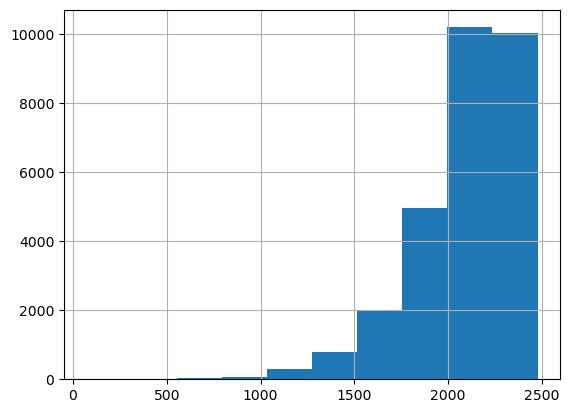

In [5]:
population.hist(bins=10)

In [8]:
population.mean()

2091.1441054189277

In [10]:
# Create a list
population = pd.DataFrame(population)
sampled_means = []

# For 1000  times,
for i in range(0,1000):
    # Take a random sample of 100 rows from the population, take the mean of those rows, append to sampled_means
    sampled_means.append(population.sample(n=100).mean().values[0])

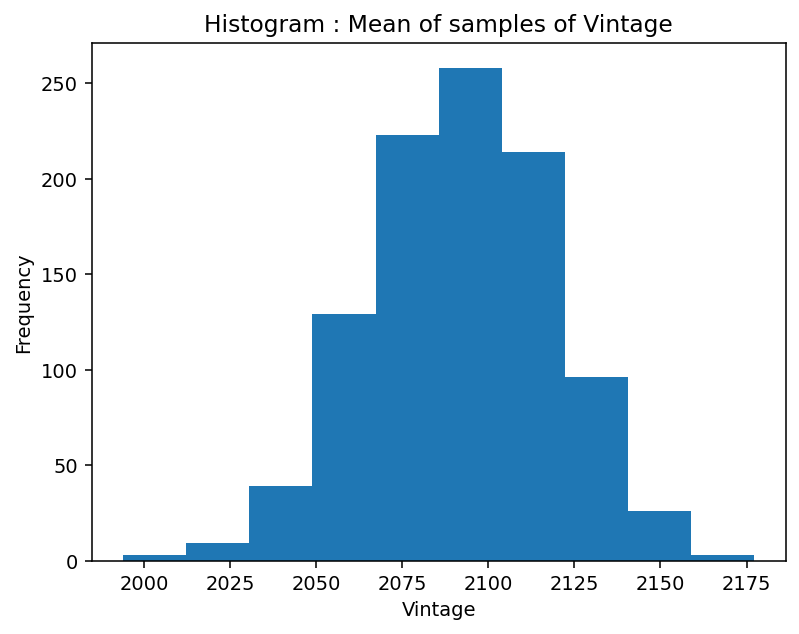

In [11]:
# plotting histogram
plt.figure(dpi = 140)
plt.hist(sampled_means)
plt.xlabel("Vintage")
plt.ylabel('Frequency')
plt.title("Histogram : Mean of samples of Vintage")
plt.show()

* 100 Samples of 100 datapoints were taken 
* Mean of the random samples actully follow the Normal Distribution
* Central Limit Theorem  can be verified by using KDE as well 

In [12]:
pd.Series(sampled_means).mean()  #Very close to the population mean

2092.10852

In [13]:
# Subtract Mean Sample Mean From True Population Mean
error = population['vintage'].mean() - pd.Series(sampled_means).mean()

# Print
print('The Mean Sample Mean is only %f different the True Population mean!' % error)

The Mean Sample Mean is only -0.964415 different the True Population mean!
